# Quantifying the diversity of ligand-specific T cell receptors

Here we apply our interval estimator to data from [Dash et al.](https://www.nature.com/articles/nature22383) on human T cell responses to three viral epitopes. Our analysis demonstrates the statistical significance of observed differences in the restriction of diversity of different components of the heterodimeric receptor.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import pydiver

plt.style.use('estimator.mplstyle')

In [2]:
df = pd.read_csv(f'data/tcrs.csv')
df['bioidentity_a'] = df['v_a_gene']+'_'+df['cdr3_a_aa']+'_'+df['j_a_gene']
df['bioidentity_b'] = df['v_b_gene']+'_'+df['cdr3_b_aa']+'_'+df['j_b_gene']
df['bioidentity'] = df['bioidentity_a']+'_'+df['bioidentity_b']
df.dropna(inplace=True)
df.drop(columns=['count','clone_id'], inplace=True)

In [3]:
dfN = df['epitope'].value_counts()
dfN

M1      249
BMLF     92
pp65     67
Name: epitope, dtype: int64

In [4]:
dfpc = df.groupby('epitope').agg(pydiver.pc_sample)
dfpc = dfpc.sort_values('bioidentity', ascending=True)
1/dfpc

,subject,v_a_gene,j_a_gene,cdr3_a_aa,v_b_gene,j_b_gene,cdr3_b_aa,bioidentity_a,bioidentity_b,bioidentity
epitope,,,,,,,,,,
M1,9.823735,5.670523,3.758948,129.188285,3.275621,3.477810,28.378676,140.345455,53.326425,1187.538462
BMLF,5.537037,2.392000,9.060606,29.272727,4.977408,6.102041,65.406250,29.272727,65.406250,837.200000
pp65,4.714286,19.918919,18.425000,67.000000,12.351955,7.019048,130.058824,67.000000,130.058824,737.000000


In [5]:
dfvarpc = df.groupby('epitope').agg(lambda x: pydiver.varpc_sample(x, method='unbiased', poisson_bound=True))
dfvarpc = dfvarpc.loc[dfpc.index]
dfvarpc

,subject,v_a_gene,j_a_gene,cdr3_a_aa,v_b_gene,j_b_gene,cdr3_b_aa,bioidentity_a,bioidentity_b,bioidentity
epitope,,,,,,,,,,
M1,0.000050,0.000571,0.000827,0.000004,0.000595,0.000746,0.000063,0.000003,0.000018,1.057120e-07
BMLF,0.000103,0.003855,0.000676,0.000158,0.000846,0.000393,0.000022,0.000158,0.000022,5.916527e-07
pp65,0.001750,0.000061,0.000094,0.000034,0.000198,0.000307,0.000013,0.000034,0.000013,6.136825e-07


In [6]:
dfvarpc_other = df.groupby('epitope').agg(lambda x: pydiver.varpc_sample(x, method='chao'))
dfvarpc_other = dfvarpc_other.loc[dfpc.index]
dfvarpc_other

,subject,v_a_gene,j_a_gene,cdr3_a_aa,v_b_gene,j_b_gene,cdr3_b_aa,bioidentity_a,bioidentity_b,bioidentity
epitope,,,,,,,,,,
M1,0.000069,0.000477,0.000722,0.000004,0.000587,0.000774,0.000065,0.000004,0.000019,2.572942e-07
BMLF,0.000190,0.003969,0.000658,0.000184,0.000926,0.000453,0.000039,0.000170,0.000034,1.397481e-06
pp65,0.001697,0.000104,0.000153,0.000068,0.000281,0.000395,0.000023,0.000055,0.000026,2.036935e-06


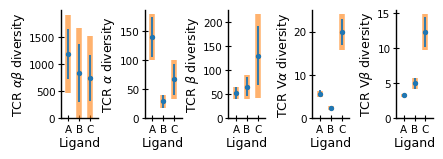

In [7]:
columns = ['bioidentity', 'bioidentity_a', 'bioidentity_b', 'v_a_gene', 'v_b_gene']
columns_to_label = {'bioidentity' : r'$\alpha\beta$',
                    'bioidentity_a' : r'$\alpha$',
                    'bioidentity_b' : r'$\beta$',
                    'v_a_gene' : r'V$\alpha$',
                    'v_b_gene' : r'V$\beta$'}

columns_to_ymax = dict(bioidentity_a=2e2,
                       bioidentity_b=2e2,
                       bioidentity=2e3)


fig, axes = plt.subplots(figsize=(4.5, 1.7), ncols=len(columns), sharex=True, sharey=False)
for i, column in enumerate(columns):
    axes[i].errorbar(['A', 'B', 'C'],
                     1/dfpc[column], dfvarpc_other[column]**.5/dfpc[column]**2,
                     fmt='o', ms=3, c='C1', alpha=.6, lw=4)
    axes[i].errorbar(['A', 'B', 'C'],
                     1/dfpc[column], dfvarpc[column]**.5/dfpc[column]**2,
                     fmt='o', ms=3, c='C0')
    axes[i].set_xlim(-0.7, 2.7)
    axes[i].ticklabel_format(axis='y', style='sci', scilimits=(-4, 4))
    axes[i].set_ylabel(f'TCR {columns_to_label[column]} diversity')

for ax in axes:
    ax.set_xlabel('Ligand')
    ax.set_ylim(0.0)
fig.tight_layout(w_pad=0.2)